# Human Stress Prediction

## Data Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('SaYoPillow.csv.xls')

In [4]:
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [5]:
df.shape

(630, 9)

In [6]:
df.size

5670

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sr,630.0,71.6,19.372833,45.0,52.50,70.0,91.25,100.0
rr,630.0,21.8,3.966111,16.0,18.50,21.0,25.00,30.0
t,630.0,92.8,3.529690,85.0,90.50,93.0,95.50,99.0
lm,630.0,11.7,4.299629,4.0,8.50,11.0,15.75,19.0
bo,630.0,90.9,3.902483,82.0,88.50,91.0,94.25,97.0
rem,630.0,88.5,11.893747,60.0,81.25,90.0,98.75,105.0
sr.1,630.0,3.7,3.054572,0.0,0.50,3.5,6.50,9.0
hr,630.0,64.5,9.915277,50.0,56.25,62.5,72.50,85.0
sl,630.0,2.0,1.415337,0.0,1.00,2.0,3.00,4.0


In [10]:
df.nunique()

sr      627
rr      626
t       626
lm      626
bo      626
rem     626
sr.1    501
hr      626
sl        5
dtype: int64

In [12]:
for column in df.columns:
    print(df[column].value_counts())

sr
80.000    2
60.000    2
50.000    2
59.120    1
97.152    1
         ..
87.440    1
47.400    1
77.760    1
65.280    1
52.080    1
Name: count, Length: 627, dtype: int64
rr
22.000    2
18.000    2
26.000    2
20.000    2
16.288    1
         ..
23.984    1
16.960    1
21.776    1
20.528    1
18.416    1
Name: count, Length: 626, dtype: int64
t
90.000    2
92.000    2
94.000    2
96.000    2
86.440    1
         ..
91.744    1
90.992    1
97.440    1
93.776    1
95.664    1
Name: count, Length: 626, dtype: int64
lm
12.000    2
8.000     2
17.000    2
10.000    2
4.576     1
         ..
14.480    1
5.920     1
11.776    1
10.528    1
8.416     1
Name: count, Length: 626, dtype: int64
bo
88.000    2
90.000    2
92.000    2
95.000    2
83.728    1
         ..
89.744    1
88.992    1
95.960    1
91.776    1
94.496    1
Name: count, Length: 626, dtype: int64
rem
95.00     2
80.00     2
100.00    2
85.00     2
62.88     1
         ..
97.48     1
69.60     1
93.88     1
87.64     1
81.04  

## Data Visualization

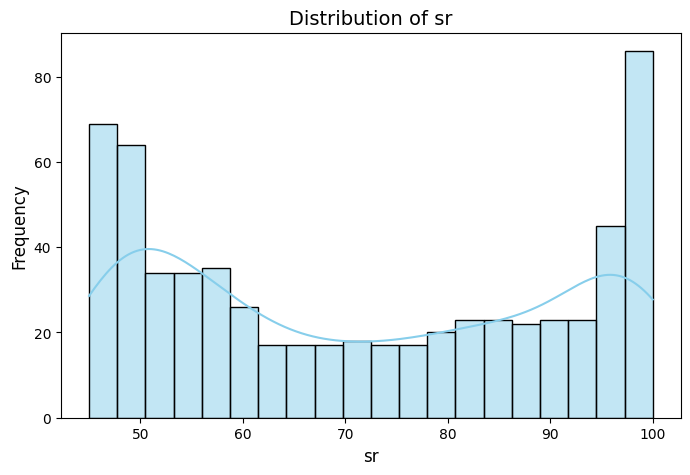

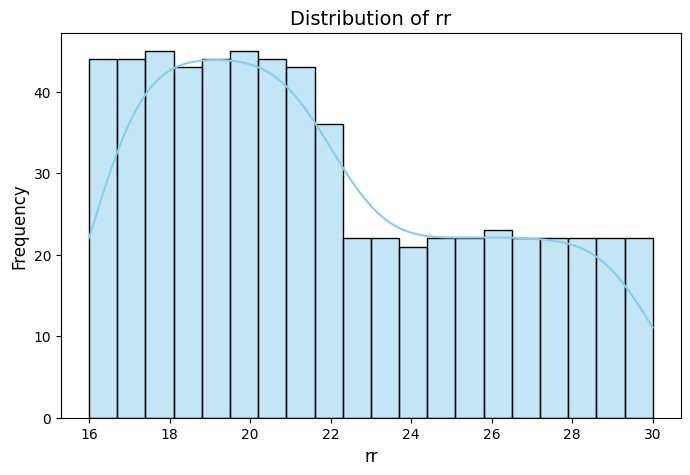

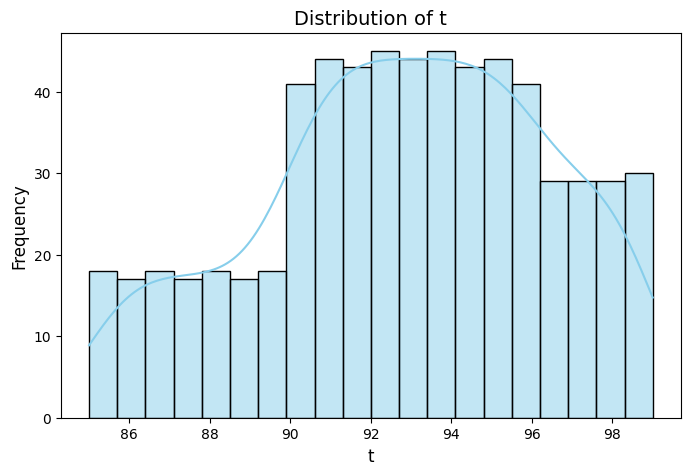

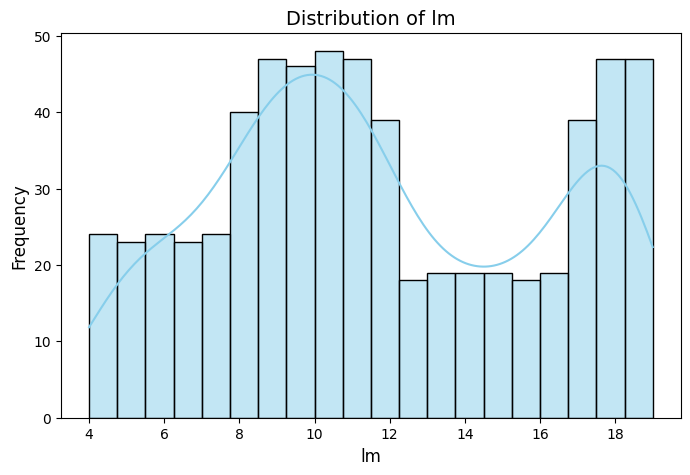

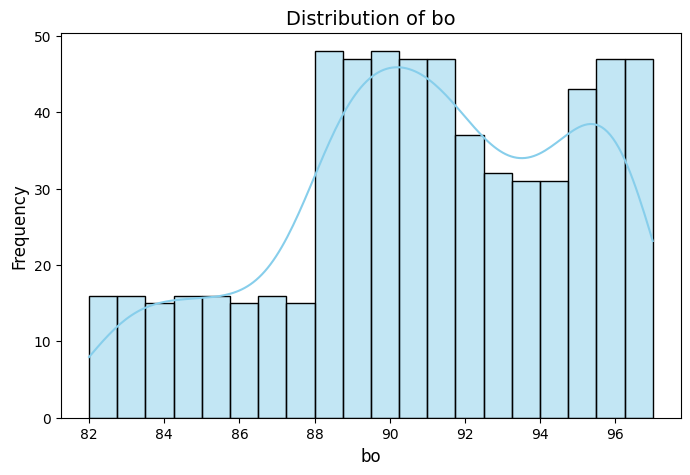

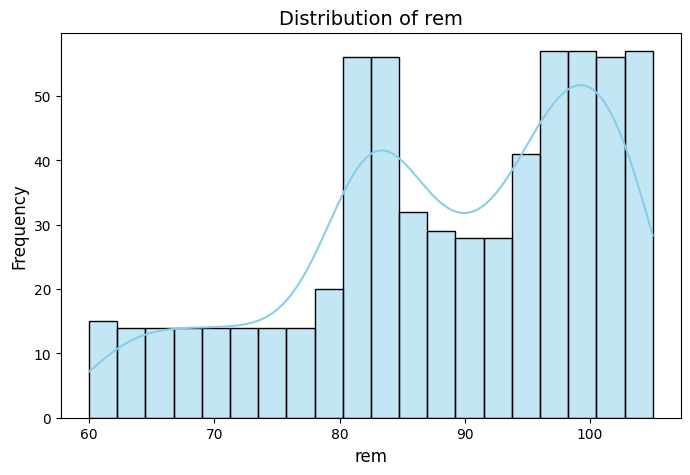

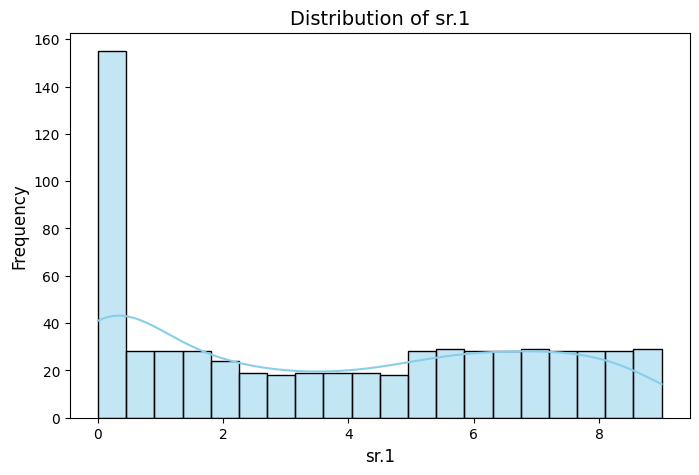

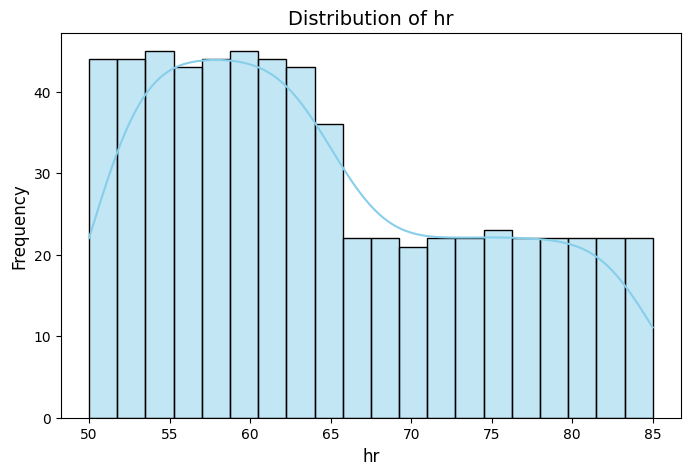

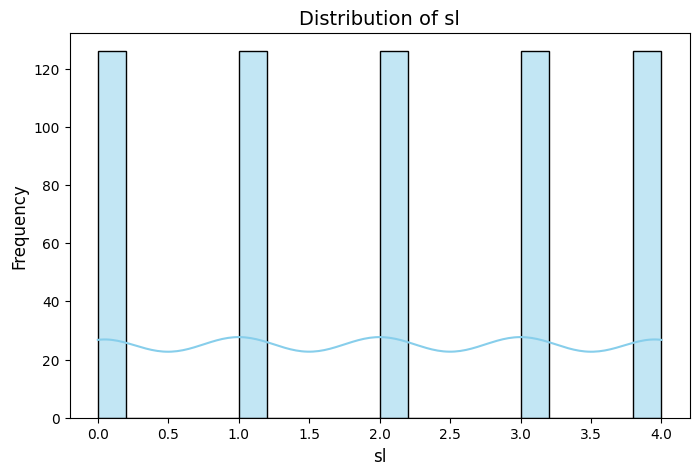

In [13]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# 🔹 Histogram for each numerical column

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=20, kde=True, color="skyblue", edgecolor="black")
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.show()

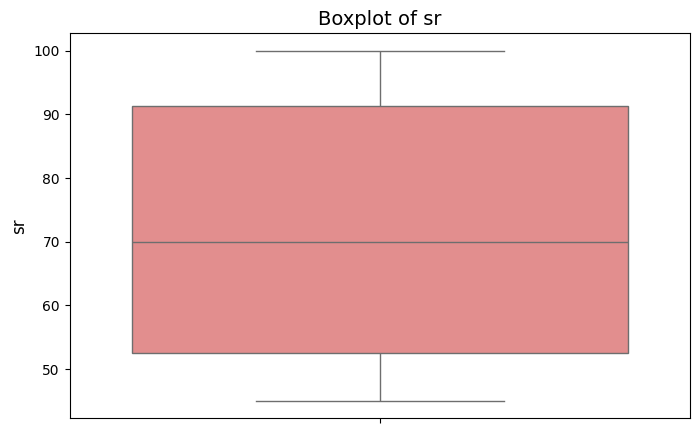

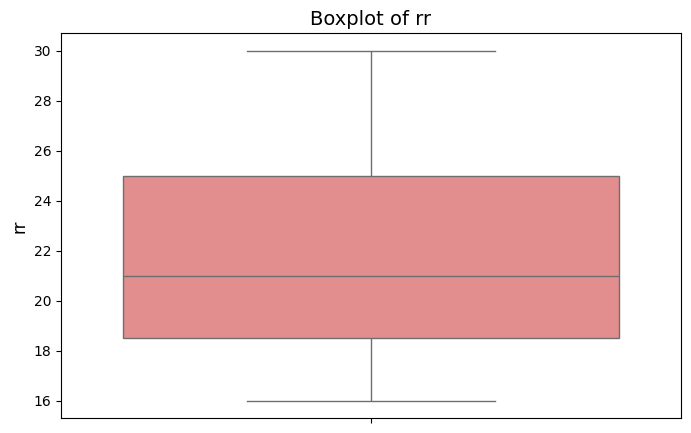

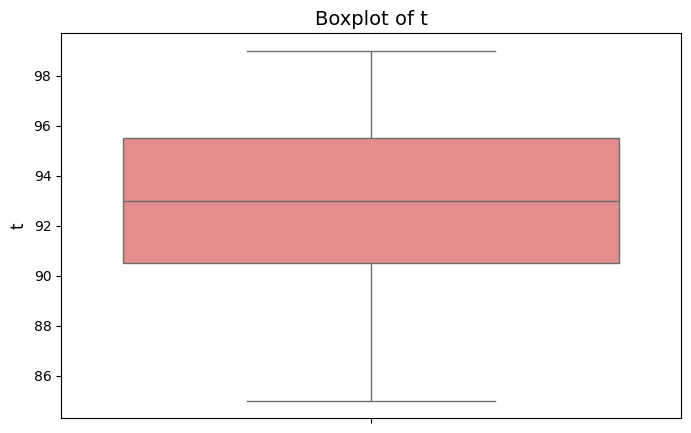

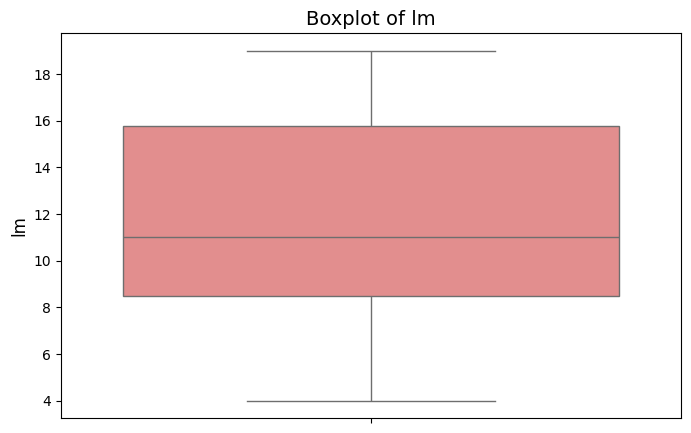

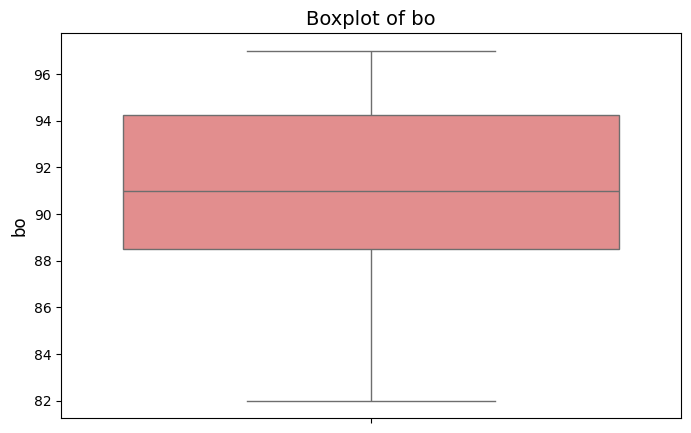

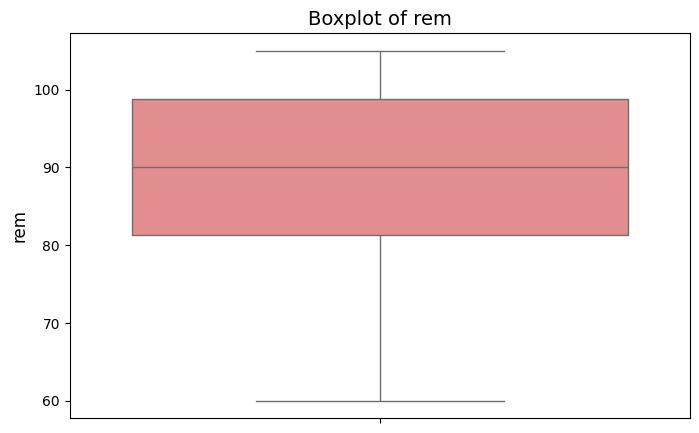

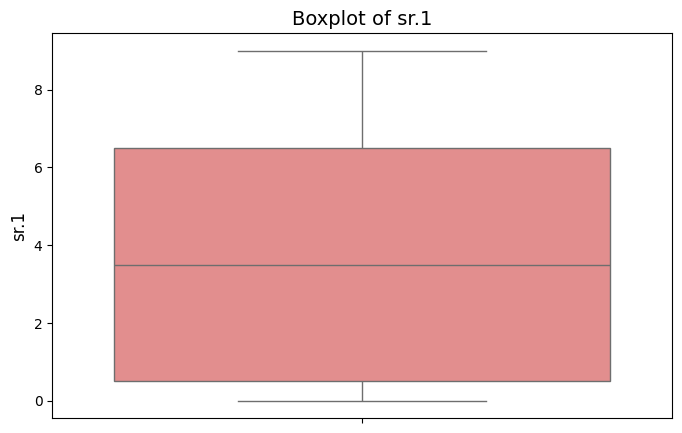

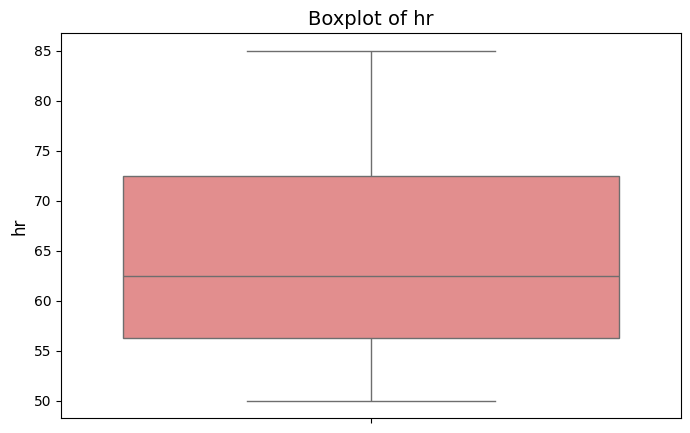

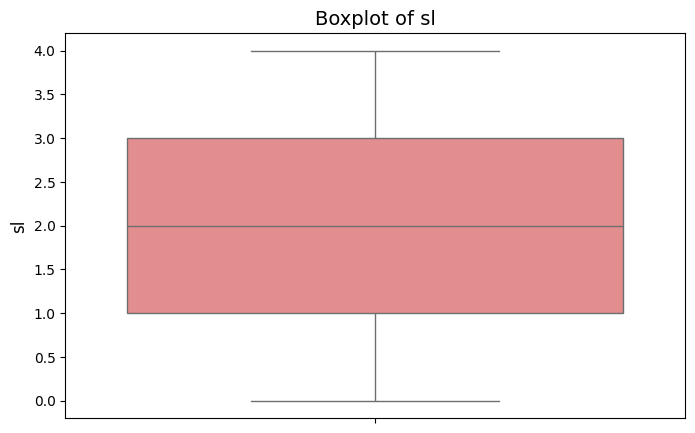

In [14]:
# Boxplots for outlier detection

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df[col], color="lightcoral")
    plt.ylabel(col, fontsize=12)
    plt.title(f"Boxplot of {col}", fontsize=14)
    plt.show()

## Data Preprocessing

In [16]:
X = df.drop(columns=['sl'])
y = df['sl']

In [17]:
# Train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training 

In [18]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [19]:
Linear_reg = LinearRegression()
Ride_reg= Ridge()
XGBoost = XGBRegressor()
Random_forest = RandomForestRegressor()
Ada_boost = AdaBoostRegressor()
Grad_boost = GradientBoostingRegressor()
Bagging= BaggingRegressor()
Decision_tree = DecisionTreeRegressor()
Svr = SVR()
Knn = KNeighborsRegressor()

In [20]:
model_li = [Ride_reg, XGBoost, Random_forest, Ada_boost, Grad_boost, Bagging, Decision_tree, Svr, Knn]

Score = []
for model in model_li:
    model.fit(X_train, y_train)
    Score.append(r2_score(y_test, model.predict(X_test)))

Score

[0.9998633278787464,
 0.9879451394081116,
 0.9994886524822695,
 0.9958628841607565,
 0.9949490327897574,
 0.9995449172576832,
 0.991725768321513,
 0.9938341072011774,
 1.0]

## Model Evaluation

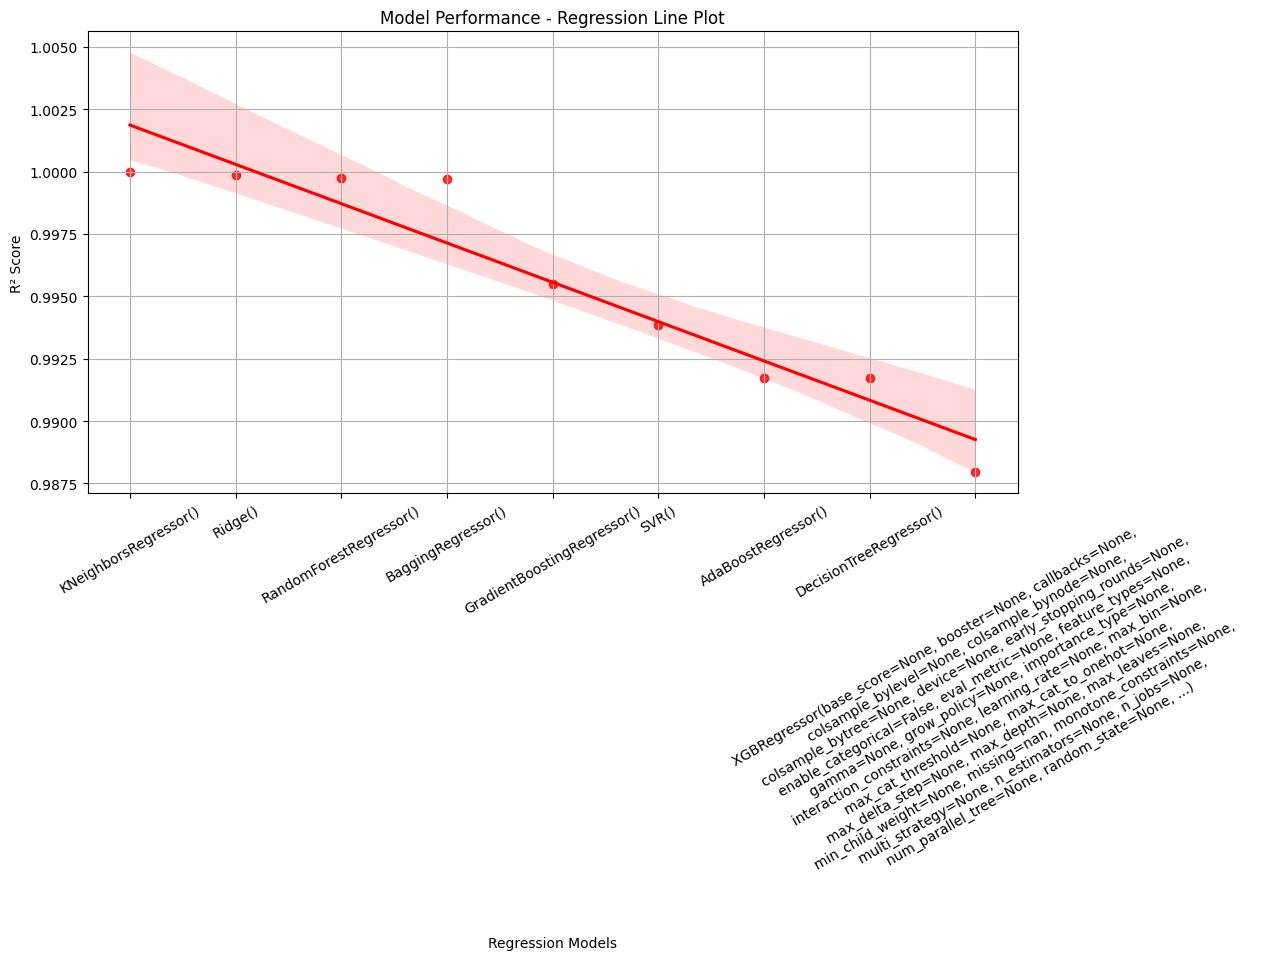

In [21]:
model_li = [Ride_reg, XGBoost, Random_forest, Ada_boost, Grad_boost, Bagging, Decision_tree, Svr, Knn]

Score = []
for model in model_li:
    model.fit(X_train, y_train)
    Score.append(r2_score(y_test, model.predict(X_test)))

df_scores = pd.DataFrame({'Model': model_li, 'R2 Score': Score})
df_scores = df_scores.sort_values(by='R2 Score', ascending=False)

# Regression line

plt.figure(figsize=(12, 6))
sns.regplot(x=list(range(len(df_scores))), y=df_scores['R2 Score'],
            scatter=True, marker="o", fit_reg=True, color="red")

plt.xticks(range(len(df_scores)), df_scores['Model'], rotation=30)
plt.xlabel("Regression Models")
plt.ylabel("R² Score")
plt.title("Model Performance - Regression Line Plot")
plt.grid(True)
plt.show()